In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datatable as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, f_regression, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score, plot_roc_curve , precision_score, roc_auc_score, recall_score

In [18]:
data = dt.fread('data\Facebook_ads.csv').to_pandas()

In [19]:
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,False
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,True
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,False
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,True
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,False


In [21]:
data.shape

(499, 6)

In [27]:
data.dtypes.value_counts()

object     3
float64    2
bool       1
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 20.1+ KB


In [29]:
data.drop(labels=['Names','emails'],axis = 1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             499 non-null    object 
 1   Time Spent on Site  499 non-null    float64
 2   Salary              499 non-null    float64
 3   Clicked             499 non-null    bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 12.3+ KB


In [32]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,499,210,Israel,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time Spent on Site,499.0,NaN,NaN,NaN,32.920178,9.103455,5.0,26.425044,33.196067,39.114995,60.0
Salary,499.0,NaN,NaN,NaN,52896.992469,18989.18315,20.0,38888.11726,52840.91311,65837.28819,100000.0
Clicked,499,2,True,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data['Country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
Malaysia               1
Name: Country, Length: 210, dtype: int64

In [37]:
data['Clicked'].value_counts()

True     250
False    249
Name: Clicked, dtype: int64

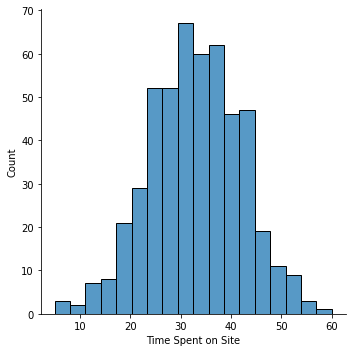

In [39]:
sns.displot(data['Time Spent on Site'])

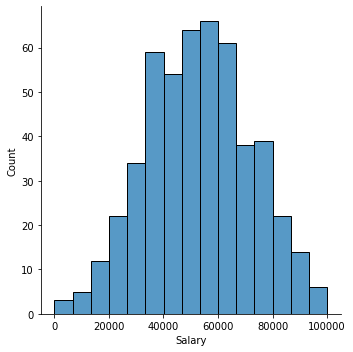

In [40]:
sns.displot(data['Salary'])

In [51]:
data_p = data.copy()

In [52]:
data_p['Clicked'] = data['Clicked'].map({False:0,True:1})

In [53]:
data_p['Clicked'].value_counts()

1    250
0    249
Name: Clicked, dtype: int64

In [55]:
data_p.drop('Country',axis = 1, inplace=True)

In [56]:
data_p.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


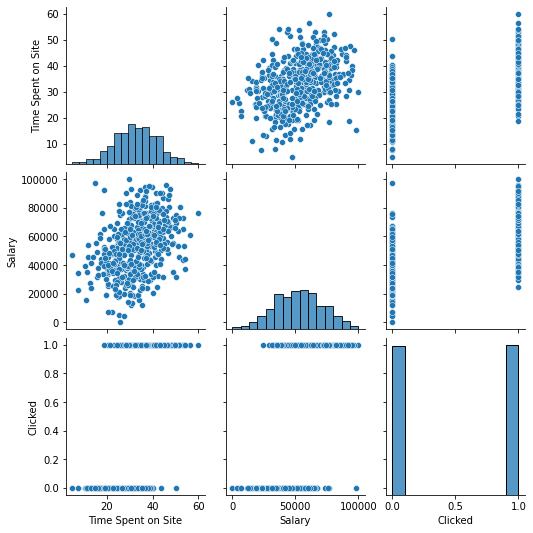

In [57]:
sns.pairplot(data_p)

<AxesSubplot:xlabel='Salary', ylabel='Time Spent on Site'>

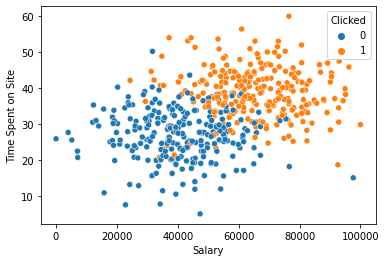

In [63]:
sns.scatterplot(x = 'Salary',y='Time Spent on Site', data = data_p, hue='Clicked')

From above scatter plot we can say that most of the users who spend more time on the webiste
& have higher salary are the one who have clicked

<AxesSubplot:xlabel='Clicked', ylabel='Salary'>

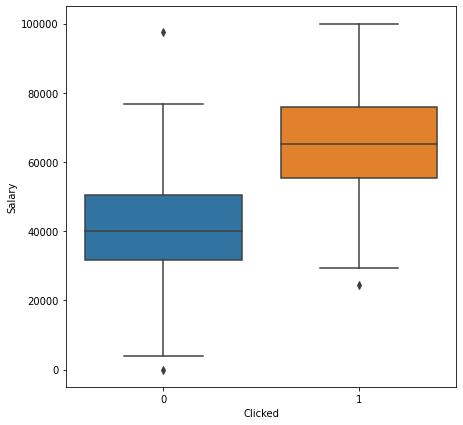

In [66]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'Clicked',y = 'Salary',data = data_p)

<AxesSubplot:xlabel='Clicked', ylabel='Time Spent on Site'>

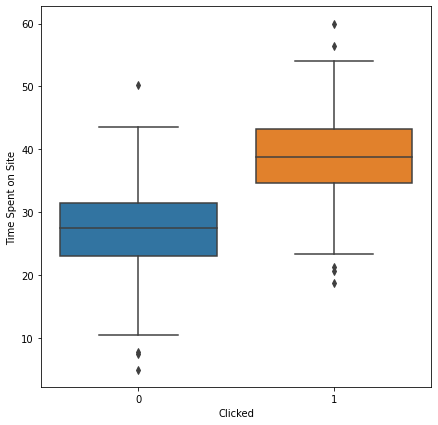

In [67]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'Clicked',y = 'Time Spent on Site',data = data_p)

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Count'>

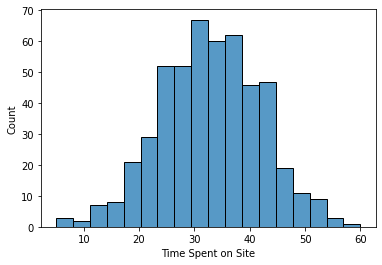

In [69]:
sns.histplot(data_p, x = 'Time Spent on Site')

<AxesSubplot:xlabel='Salary', ylabel='Count'>

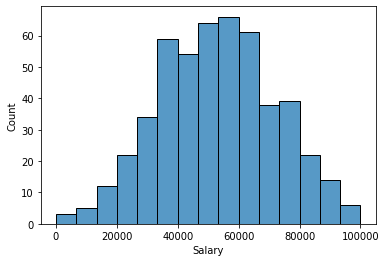

In [70]:
sns.histplot(data_p, x = 'Salary')

In [106]:
X_train,X_test, y_train, y_test = train_test_split(
                data_p.drop(labels=['Clicked'],axis = 1),
                data_p['Clicked'],
                test_size=0.2,
                random_state=0)

In [107]:
X_train.shape,X_test.shape

((399, 2), (100, 2))

In [108]:
# Standardinsation with StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# Fit the sclaer to train set to learn all parameters
scaler.fit(X_train)

# Transform train & test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
# Looking at the mean 
scaler.mean_

array([3.30196881e+01, 5.25865448e+04])

In [110]:
# Looking at the standard deviation

scaler.scale_

array([8.87310754e+00, 1.89600739e+04])

In [111]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [112]:
# We can see that mean is zero & std is 1 for scaled features
round(X_train_scaled.describe(),1)

,Time Spent on Site,Salary
count,399.00000,399.00000
mean,0.00000,0.00000
std,1.00000,1.00000
min,-3.20000,-2.80000
25%,-0.70000,-0.80000
50%,0.00000,0.00000
75%,0.70000,0.70000
max,2.40000,2.40000


In [113]:
# Building logistic Regression model

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled,y_train)


LogisticRegression(random_state=0)

In [114]:
y_predict_train = classifier.predict(X_train_scaled)
y_predict_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

<AxesSubplot:>

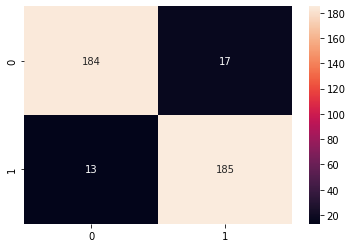

In [115]:
# Classification Report & Confusion Metric
# pd.options.display.float_format = '{:.5f}'.format
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt = 'd')

In [116]:
y_predict_test = classifier.predict(X_test_scaled)
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

<AxesSubplot:>

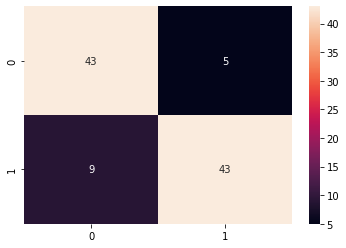

In [117]:
# Classification Report & Confusion Metric

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt = 'd')

In [118]:
y_predict_test.shape

(100,)

In [119]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

